In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Path and Dropping NaN values
path = r'../Life_Expectancy_preprocessed.csv'
# Change path to suit your local environment
data = pd.read_csv(path)
cleanData = data.dropna()

#Variables for Multiple Linear Regression
# or we can use an index to slice
X = cleanData[['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure',
               'Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Life expectancy']]

#train_test_split method for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [32]:
#Importing DecisionTreeRegesor so we can predict from class labels of data points instead of numerical

from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor(
    max_depth=5,              # Set the maximum depth of the tree
    min_samples_split=5,      # Set the minimum samples required to split a node
    min_samples_leaf=2,       # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,      # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)

treeReg.fit(X_train, y_train)

yTreeTest_pred = treeReg.predict(X_test)

In [33]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, yTreeTest_pred)
r2_treeTest = r2_score(y_test, yTreeTest_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")
print(f"Decision Tree testing R squared: {r2_treeTest}")

Decision Tree testing data MSE: 8.602301834367491
Decision Tree testing R squared: 0.8788791761199576


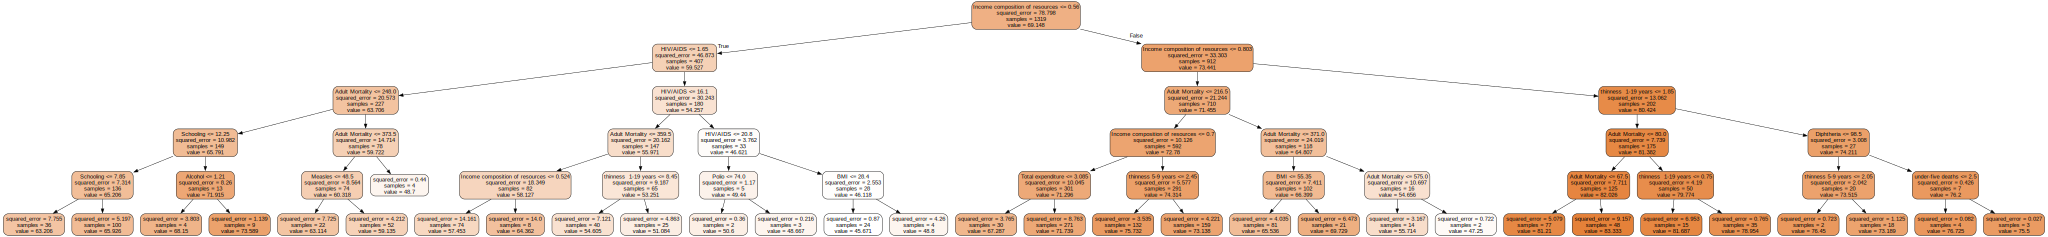

In [34]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    treeReg,
    feature_names = X.columns,
    class_names = y,
    rounded=True,
    filled=True 
)

graphviz.Source(dot_data) 

# Example
# But what is the best pruned tree?\
# Let's figure it out

In [35]:
feature_importances = treeReg.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(importance_df)


Feature Importances:
                            Feature  Importance
16  Income composition of resources    0.716993
0                   Adult Mortality    0.123560
11                         HIV/AIDS    0.118403
14             thinness  1-19 years    0.015334
17                        Schooling    0.007605
9                 Total expenditure    0.005579
15               thinness 5-9 years    0.005255
6                               BMI    0.003404
5                           Measles    0.002550
2                           Alcohol    0.000853
10                       Diphtheria    0.000389
8                             Polio    0.000047
7                 under-five deaths    0.000027
1                     infant deaths    0.000000
4                       Hepatitis B    0.000000
12                              GDP    0.000000
13                       Population    0.000000
3            percentage expenditure    0.000000


Gridsearch

Fine parameter tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [37]:
treeReg = DecisionTreeRegressor()

param_grid = {
    'max_depth':[3,4,5,6],         # Set the maximum depth of the tree
    'max_leaf_nodes':[None,6,7],   # Limit the maximum number of leaf nodes (optional)
    'min_samples_split':[2,3,4],   # Set the minimum samples required to split a node
    'min_samples_leaf':[1,2,3,4,5]     # Set the minimum samples required in a leaf node
    }

In [38]:
grid_search = GridSearchCV(treeReg, param_grid = param_grid, cv = 5, scoring = 'r2', refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_leaf_nodes': [None, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

In [39]:
print('best parameters : ', grid_search.best_params_)
print('best score : ', round(grid_search.best_score_, 4))

best parameters :  {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 4}
best score :  0.9029


Best Decision Tree

In [40]:
bestTree = DecisionTreeRegressor(
    max_depth=6,                  # Set the maximum depth of the tree
    min_samples_split=2,          # Set the minimum samples required to split a node
    min_samples_leaf=4,           # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,          # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)


bestTree.fit(X_train, y_train)

# Export the model to a .pk1 file
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(bestTree, f)

best_pred = bestTree.predict(X_test)

In [41]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, best_pred)
r2_treeTest = r2_score(y_test, best_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")  # or we can use RMSE
print(f"Decision Tree testing R score: {r2_treeTest}")

Decision Tree testing data MSE: 7.738228247720124
Decision Tree testing R score: 0.8910453738101607


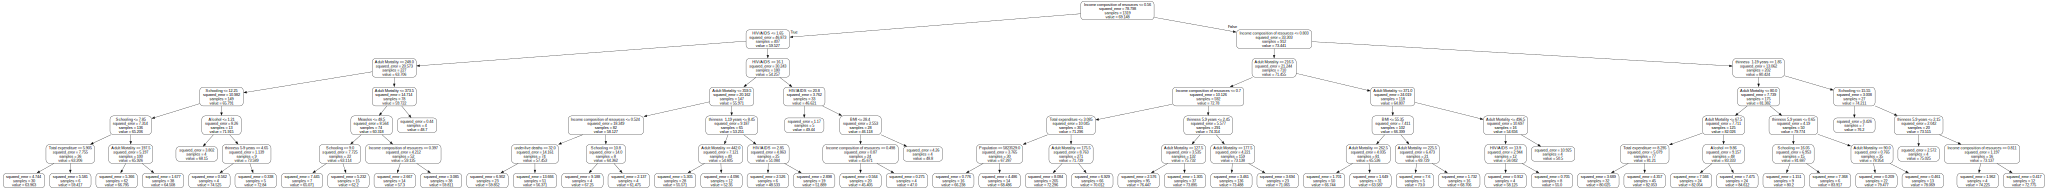

In [42]:
dot_data = export_graphviz(
    bestTree,
    feature_names = X.columns,
    class_names = y,
    rounded=True
)

graphviz.Source(dot_data) 

In [43]:
feature_importances = bestTree.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(importance_df)


Feature Importances:
                            Feature  Importance
16  Income composition of resources    0.704633
0                   Adult Mortality    0.131554
11                         HIV/AIDS    0.117020
14             thinness  1-19 years    0.014251
17                        Schooling    0.009441
9                 Total expenditure    0.007320
15               thinness 5-9 years    0.005946
6                               BMI    0.003341
5                           Measles    0.002503
7                 under-five deaths    0.001965
2                           Alcohol    0.001641
13                       Population    0.000386
8                             Polio    0.000000
1                     infant deaths    0.000000
10                       Diphtheria    0.000000
4                       Hepatitis B    0.000000
12                              GDP    0.000000
3            percentage expenditure    0.000000


mprof: Sampling memory every 0.1s
running new process
running as a Python program...


/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/memory_profiler.py", line 1351, in <module>
    exec_with_profiler(script_filename, prof, args.backend, script_args)
  File "/Users/jules/github/DataScience-Paper/.conda/lib/python3.10/site-packages/memory_profiler.py", line 1252, in exec_with_profiler
    exec(compile(f.read(), filename, 'exec'), ns, ns)
  File "statistics/memoryAndCpu.py", line 35, in <module>
    predict(

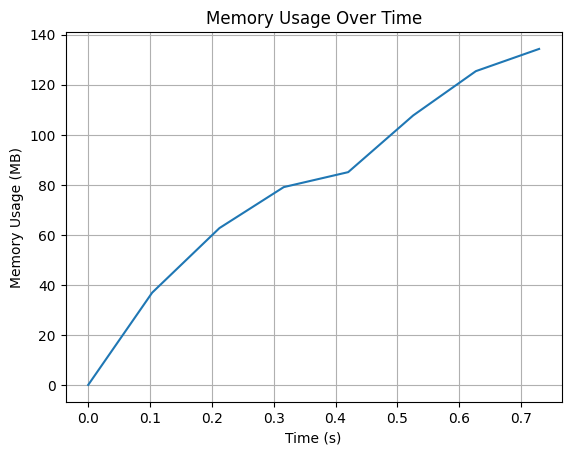

In [44]:
import os
import subprocess

# Run the script with memory profiling using subprocess
subprocess.run(['mprof', 'run', 'statistics/memoryAndCpu.py'])

# List all memory usage data files the output is structured like this: id filename time date
files = subprocess.check_output(['mprof', 'list']).decode('utf-8').strip().split('\n')

# Get the most recent memory usage data file (sorted by id)
filename = files[-1].split()[1]

# Read the memory usage data file
output = open(filename, 'rb').read()

# Clean up the memory usage data file by running it through mprof clean
os.system(f'mprof clean')

# Parse the memory data and extract memory usage values and timestamps
timestamps = []
memory_usages = []
first_timestamp = None

# Iterate through each line in the memory data
for line in output.decode('utf-8').strip().split('\n'):
    # Skip the first line
    if line.startswith('CMDLINE'):
        continue
    parts = line.strip().split()
    if len(parts) == 3:
        try:
            # Make the first timestamp 0
            if first_timestamp is None:
                first_timestamp = float(parts[2])
                
            # Calculate the timestamp and memory usage
            timestamp = float(parts[2]) - first_timestamp
            memory_usage = float(parts[1])
            timestamps.append(timestamp)
            memory_usages.append(memory_usage)
        except ValueError:
            pass  # Skip lines that don't have valid data

# Create a memory usage plot
plt.plot(timestamps, memory_usages)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Over Time')
plt.grid(True)

# Show the memory usage plot
plt.show()


In [45]:
# Open the file cpu_usage_measurements.csv for reading
with open('cpu_usage_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    cpuLines = f.readlines()

# Open the file time_measurements.csv for reading
with open('time_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    timeLines = f.readlines()

# Delete the file time_measurements.csv
os.remove('time_measurements.csv')
# Delete the file cpu_usage_measurements.csv
os.remove('cpu_usage_measurements.csv')

# Make it a float
cpuLines = [float(line.strip()) for line in cpuLines]

timeLines = [float(line.strip()) for line in timeLines]



# Show the data on a plot
plt.plot(timeLines, cpuLines)
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.grid(True)

FileNotFoundError: [Errno 2] No such file or directory: 'cpu_usage_measurements.csv'